In [ ]:
'''
Como o KNN escolhe os vizinhos?
O KNN sempre olha para os dados mais próximos do ponto que ele precisa
classificar ou prever.
Proximidade aqui significa: quem está mais perto no espaço das variáveis
(idade, horas de estudo, faltas, etc.).

Para medir essa "distância", o algoritmo usa principalmente a Distância
Euclidiana, que é a fórmula clássica da matemática para medir a distância entre
dois pontos.

No caso da nossa base de alunos, essa distância seria calculada usando:

* idade
* horas de estudo
* faltas

Exemplo prático:
Se temos um aluno com [idade=17, horas_estudo=3, faltas=2], o algoritmo calcula
a distância desse ponto para todos os outros registros da base de dados.

Como ele decide?
O KNN ordena todos os dados pela distância
Seleciona os K mais próximos (por exemplo, os 3 ou 5 mais próximos)
Classificação: olha qual classe aparece mais entre os vizinhos
Regressão: faz a média dos valores dos vizinhos

Pense em um mapa de pontos coloridos.
Quando chega um novo ponto, o algoritmo pergunta:

"Quem são os vizinhos mais próximos?"
Ele olha para os pontos do lado, conta quantos são vermelhos, azuis, verdes...
E decide o resultado com base nos mais próximos.
'''

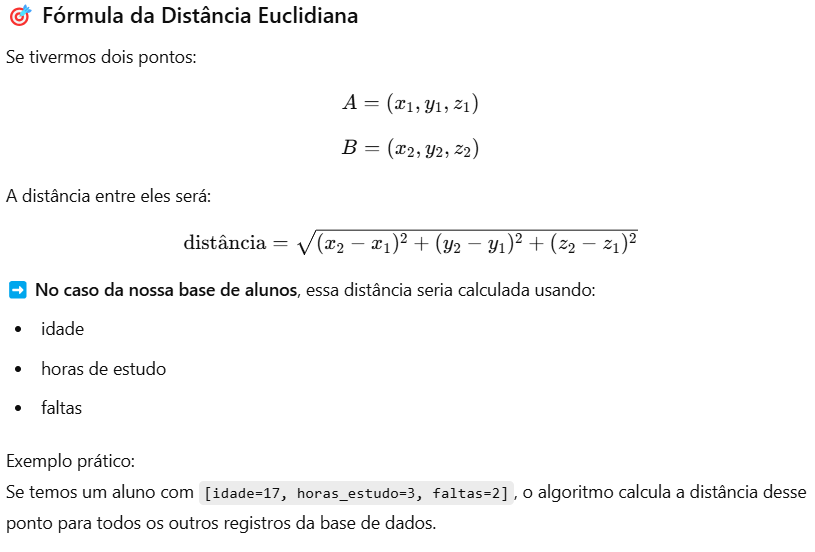

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Dados de exemplo: [peso, cor (0 = vermelha, 1 = laranja)]
X = [
    [150, 0],  # Maçã
    [170, 0],  # Maçã
    [140, 0],  # Maçã
    [130, 1],  # Laranja
    [120, 1],  # Laranja
    [110, 1]   # Laranja
]

# Rótulos: 0 = Maçã, 1 = Laranja
y = [0, 0, 0, 1, 1, 1]

# Criando o modelo KNN
modelo = KNeighborsClassifier(n_neighbors=3)  # Olhar para os 3 vizinhos mais próximos

# Treinando o modelo
modelo.fit(X, y)

# Nova fruta para classificar
nova_fruta = [[160, 0]]

# Fazendo a previsão
resultado = modelo.predict(nova_fruta)

# Exibindo o resultado
if resultado[0] == 0:
    print("A nova fruta provavelmente é uma maçã.")
else:
    print("A nova fruta provavelmente é uma laranja.")

A nova fruta provavelmente é uma maçã.


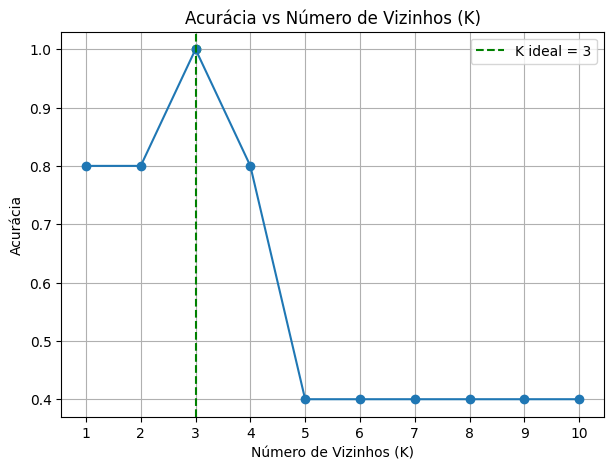


✅ O número ideal de vizinhos foi K = 3 com acurácia de 1.00

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



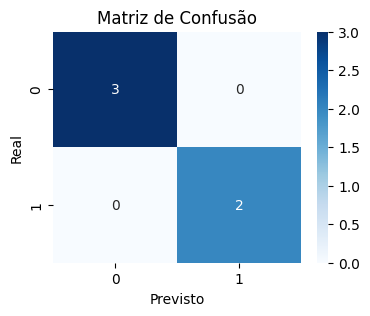

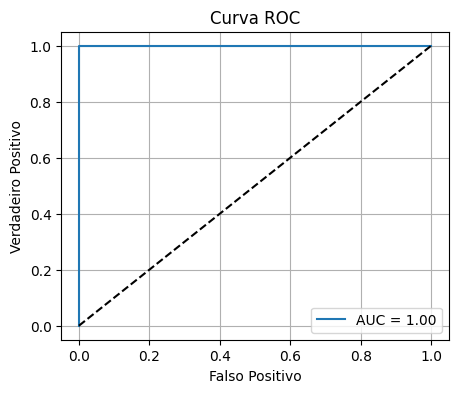

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# 1. Base de dados realista
dados = {
    'idade': [16, 17, 16, 18, 17, 16, 18, 19, 17, 16, 18, 17, 19, 16, 18],
    'horas_estudo': [2, 3, 1, 4, 2, 1, 5, 4, 3, 2, 5, 3, 4, 1, 4],
    'faltas': [5, 3, 8, 2, 6, 9, 1, 2, 4, 7, 1, 3, 2, 8, 1],
    'nota_final': [12, 14, 9, 16, 10, 8, 17, 15, 13, 9, 18, 14, 16, 7, 17]
}

df = pd.DataFrame(dados)
df['passou'] = df['nota_final'].apply(lambda x: 1 if x >= 12 else 0)

# 2. Separar variáveis
X = df[['idade', 'horas_estudo', 'faltas']]
y = df['passou']

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Testar vários valores de K
k_values = range(1, 11)
scores = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 5. Encontrar K ideal
melhor_k = k_values[scores.index(max(scores))]
melhor_score = max(scores)

# 6. Plotando desempenho
plt.figure(figsize=(7, 5))
plt.plot(k_values, scores, marker='o')
plt.title('Acurácia vs Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(melhor_k, color='green', linestyle='--', label=f'K ideal = {melhor_k}')
plt.scatter(melhor_k, melhor_score, color='green')
plt.legend()
plt.show()

print(f"\n✅ O número ideal de vizinhos foi K = {melhor_k} com acurácia de {melhor_score:.2f}")

# 7. Re-treinando com K ideal
modelo_final = KNeighborsClassifier(n_neighbors=melhor_k)
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)
y_proba = modelo_final.predict_proba(X_test)[:, 1]

# 8. Relatório de Classificação
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# 9. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 10. Curva ROC + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

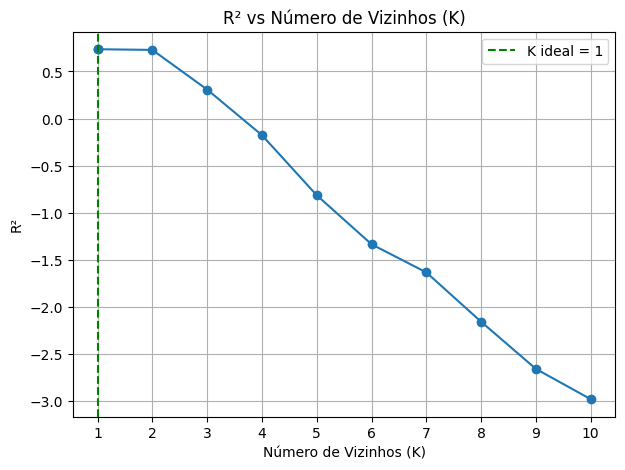


✅ O número ideal de vizinhos foi K = 1 com R² = 0.74

📊 Avaliação do Modelo:
MAE (Erro Absoluto Médio): 1.00
MSE (Erro Quadrático Médio): 1.80
R² (Coeficiente de Determinação): 0.74


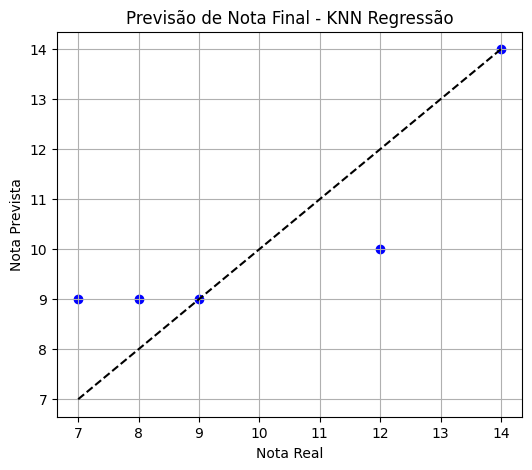

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Base de dados realista
dados = {
    'idade': [16, 17, 16, 18, 17, 16, 18, 19, 17, 16, 18, 17, 19, 16, 18],
    'horas_estudo': [2, 3, 1, 4, 2, 1, 5, 4, 3, 2, 5, 3, 4, 1, 4],
    'faltas': [5, 3, 8, 2, 6, 9, 1, 2, 4, 7, 1, 3, 2, 8, 1],
    'nota_final': [12, 14, 9, 16, 10, 8, 17, 15, 13, 9, 18, 14, 16, 7, 17]
}

df = pd.DataFrame(dados)

# 2. Separar variáveis
X = df[['idade', 'horas_estudo', 'faltas']]
y = df['nota_final']

# 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Testar vários Ks
k_values = range(1, 11)
scores = []

for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

# 5. Encontrar K ideal
melhor_k = k_values[scores.index(max(scores))]
melhor_score = max(scores)

# 6. Plotar desempenho
plt.figure(figsize=(7, 5))
plt.plot(k_values, scores, marker='o')
plt.title('R² vs Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('R²')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(melhor_k, color='green', linestyle='--', label=f'K ideal = {melhor_k}')
plt.scatter(melhor_k, melhor_score, color='green')
plt.legend()
plt.show()

print(f"\n✅ O número ideal de vizinhos foi K = {melhor_k} com R² = {melhor_score:.2f}")

# 7. Treinar modelo final com K ideal
modelo_final = KNeighborsRegressor(n_neighbors=melhor_k)
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

# 8. Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Avaliação do Modelo:")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

# 9. Visualização das previsões
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Nota Real')
plt.ylabel('Nota Prevista')
plt.title('Previsão de Nota Final - KNN Regressão')
plt.grid(True)
plt.show()

In [ ]:
'''
Nesse exemplo temos duas variáveis independentes como texto, assim, usamos
o One Hot encoder para transforma-las em 0 e 1, além disso, as duas outras
variáveis independentes numéricas estão em dimensão muito diferentes, idade em
dezena e renda em milhar, assim é mais viável nomralizá-las com o standScaler,
antes de rodar o modelo
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Criando o DataFrame
dados = {
    'idade': [25, 45, 35, 50, 23],
    'renda': [2000, 5000, 3000, 7000, 2500],
    'sexo': ['M', 'F', 'M', 'F', 'F'],
    'estado_civil': ['Solteiro', 'Casado', 'Solteiro', 'Casado', 'Solteiro'],
    'comprou_produto': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(dados)

# 2. Separando X e y
X = df[['idade', 'renda', 'sexo', 'estado_civil']]
y = df['comprou_produto']

# 3. Identificando variáveis categóricas e numéricas
colunas_categoricas = ['sexo', 'estado_civil']
colunas_numericas = ['idade', 'renda']

# 4. Criando o pré-processador (OneHot + Scaler)
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), colunas_numericas),
    ('cat', OneHotEncoder(), colunas_categoricas)
])

# 5. Criando o pipeline KNN
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# 6. Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 7. Treinando o modelo
pipeline.fit(X_train, y_train)

# 8. Fazendo previsões
y_pred = pipeline.predict(X_test)

# 9. Avaliação
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n✅ Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


📄 Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


✅ Matriz de Confusão:
[[1 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
